In [1]:
import pandas as pd
import numpy as np
import warnings
from sklearn.ensemble import ExtraTreesRegressor
from utils import utils_gn, utils_sevsn, utils_noah, utils_models
import importlib
importlib.reload(utils_gn)
importlib.reload(utils_sevsn)
importlib.reload(utils_noah)
importlib.reload(utils_models)
warnings.filterwarnings('ignore')

In [2]:
# read the data
df_raw = (utils_gn.read_data('severson_all.pkl')).drop('cycle_life', axis=1).join(utils_gn.read_data('noah_all.pkl'))
df = df_raw.copy()
df.head()

,mean_Q_100_10,log_mean_Q_100_10,var_Q_100_10,log_var_Q_100_10,min_Q_100_10,log_min_Q_100_10,skew_Q_100_10,log_skew_Q_100_10,kurt_Q_100_10,log_kurt_Q_100_10,...,dVdQpeak_maxmag_di_y_100m0,dVdQpeak_maxmag_di_y_diff,dVdQpeak_maxarea_di_y_0,dVdQpeak_maxarea_di_y_50,dVdQpeak_maxarea_di_y_100,dVdQpeak_maxarea_di_y_100m0,dVdQpeak_maxarea_di_y_diff,dSOHdCycCyc1,dSOHdCycCyc100,cycle_life
b1c0,-0.002873,-2.541602,0.000010,-5.014861,-0.008460,-2.072648,-0.532058,-0.274041,1.651688,0.217928,...,-0.005282,0.003144,-79.299389,-75.009448,-68.133388,11.166000,2.586119,0.000388,-0.000031,1851.0
b1c1,-0.004100,-2.387257,0.000010,-5.013960,-0.011004,-1.958457,-0.429375,-0.367163,1.970884,0.294661,...,0.001686,0.000501,-75.511329,-73.411862,-60.405989,15.105340,10.906407,0.000396,-0.000019,2159.0
b1c2,-0.004487,-2.348070,0.000018,-4.737000,-0.017216,-1.764058,-1.080194,0.033502,3.348637,0.524868,...,-0.005399,0.004043,-76.601709,-73.345940,-65.414446,11.187263,4.675725,0.000312,-0.000013,2236.0
b1c3,-0.007456,-2.127507,0.000036,-4.442613,-0.018961,-1.722149,-0.439050,-0.357486,1.904584,0.279800,...,-0.002219,0.012165,-80.446334,-67.731448,-55.749502,24.696832,-0.732940,0.000353,-0.000013,1433.0
b1c4,-0.005750,-2.240332,0.000023,-4.647744,-0.013958,-1.855177,-0.362548,-0.440634,1.666169,0.221719,...,0.002736,0.001597,-75.575598,-65.232594,-55.730088,19.845510,-0.840498,0.000347,-0.000030,1708.0


In [3]:
df.index

Index(['b1c0', 'b1c1', 'b1c2', 'b1c3', 'b1c4', 'b1c5', 'b1c6', 'b1c7', 'b1c9',
       'b1c11',
       ...
       'b3c33', 'b3c34', 'b3c35', 'b3c36', 'b3c40', 'b3c41', 'b3c42', 'b3c43',
       'b3c44', 'b3c45'],
      dtype='object', length=124)

In [4]:
df.columns

Index(['mean_Q_100_10', 'log_mean_Q_100_10', 'var_Q_100_10',
       'log_var_Q_100_10', 'min_Q_100_10', 'log_min_Q_100_10', 'skew_Q_100_10',
       'log_skew_Q_100_10', 'kurt_Q_100_10', 'log_kurt_Q_100_10',
       ...
       'dVdQpeak_maxmag_di_y_100m0', 'dVdQpeak_maxmag_di_y_diff',
       'dVdQpeak_maxarea_di_y_0', 'dVdQpeak_maxarea_di_y_50',
       'dVdQpeak_maxarea_di_y_100', 'dVdQpeak_maxarea_di_y_100m0',
       'dVdQpeak_maxarea_di_y_diff', 'dSOHdCycCyc1', 'dSOHdCycCyc100',
       'cycle_life'],
      dtype='object', length=245)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 124 entries, b1c0 to b3c45
Columns: 245 entries, mean_Q_100_10 to cycle_life
dtypes: float64(245)
memory usage: 242.4+ KB


In [6]:
df.describe()

,mean_Q_100_10,log_mean_Q_100_10,var_Q_100_10,log_var_Q_100_10,min_Q_100_10,log_min_Q_100_10,skew_Q_100_10,log_skew_Q_100_10,kurt_Q_100_10,log_kurt_Q_100_10,...,dVdQpeak_maxmag_di_y_100m0,dVdQpeak_maxmag_di_y_diff,dVdQpeak_maxarea_di_y_0,dVdQpeak_maxarea_di_y_50,dVdQpeak_maxarea_di_y_100,dVdQpeak_maxarea_di_y_100m0,dVdQpeak_maxarea_di_y_diff,dSOHdCycCyc1,dSOHdCycCyc100,cycle_life
count,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,...,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000
mean,-0.018901,-1.795793,0.000223,-3.835354,-0.040760,-1.440500,-0.103301,-0.777828,1.857125,0.261912,...,-0.000860,0.006225,-86.421878,-61.174991,-46.747626,40.011316,-11.308809,0.000265,-0.000069,807.241935
std,0.011347,0.270904,0.000262,0.411134,0.020373,0.217995,0.330102,0.425974,0.454478,0.067593,...,0.046542,0.046324,11.467643,12.863652,6.312352,9.989366,20.046688,0.000136,0.000137,364.359118
min,-0.077684,-3.105396,0.000010,-5.014861,-0.138026,-2.251053,-1.080194,-2.337813,1.612805,0.207582,...,-0.040421,-0.052170,-112.994264,-88.677648,-69.014721,0.491715,-85.815278,-0.000126,-0.001108,170.000000
25%,-0.024233,-1.950487,0.000077,-4.114970,-0.052091,-1.573442,-0.285918,-0.976312,1.710361,0.233088,...,-0.008152,-0.002622,-92.562247,-71.707141,-48.543997,36.915481,-26.371329,0.000190,-0.000065,525.750000
50%,-0.017671,-1.752752,0.000168,-3.775169,-0.038753,-1.411715,-0.141639,-0.713148,1.761561,0.245898,...,-0.005461,0.001079,-86.660594,-59.687399,-44.930027,41.479825,-6.326848,0.000246,-0.000038,743.000000
75%,-0.011208,-1.615590,0.000298,-3.526121,-0.026703,-1.283235,-0.001193,-0.472983,1.866319,0.270984,...,-0.002174,0.005336,-82.555981,-50.581414,-42.971080,46.361411,4.678101,0.000336,-0.000025,945.500000
max,0.000785,-1.109668,0.001875,-2.726901,-0.005610,-0.860038,1.986572,0.298104,5.920243,0.772340,...,0.491715,0.491715,0.491715,-21.537204,-30.971796,61.613879,23.552556,0.000990,0.000211,2236.000000


In [7]:
# prune cells with more than 1250 cycle life
df = df[df['cycle_life'] <= 1250]
df.index

Index(['b1c5', 'b1c6', 'b1c7', 'b1c9', 'b1c11', 'b1c14', 'b1c15', 'b1c16',
       'b1c17', 'b1c18',
       ...
       'b3c29', 'b3c30', 'b3c31', 'b3c34', 'b3c35', 'b3c36', 'b3c40', 'b3c41',
       'b3c43', 'b3c44'],
      dtype='object', length=113)

In [8]:
# define paramters to use
test_size= 0.2
params= {"n_estimators": 500,
        "max_depth": 4,
        "min_samples_split": 5,
        "criterion": "squared_error"}

### Extratrees regression without scaling and feature selection

Tree-based regression has started...
Tree-based regression has ended after 0.73 seconds
------------------
Model metrics:
------------------
Train:
{'MAE': 28.33855707907962,
 'MAPE': 0.04450198650123863,
 'MSE': 1322.1202748651835,
 'R2 score': 0.9710286757327411,
 'RMSE': 36.3609718635955}
Test:
{'MAE': 56.244199232814005,
 'MAPE': 0.08332331604149078,
 'MSE': 4834.036887855938,
 'R2 score': 0.9116652557845007,
 'RMSE': 69.52723845987225}


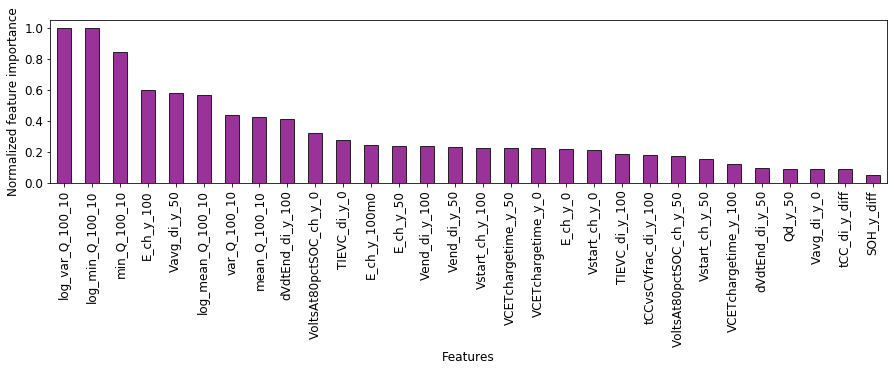

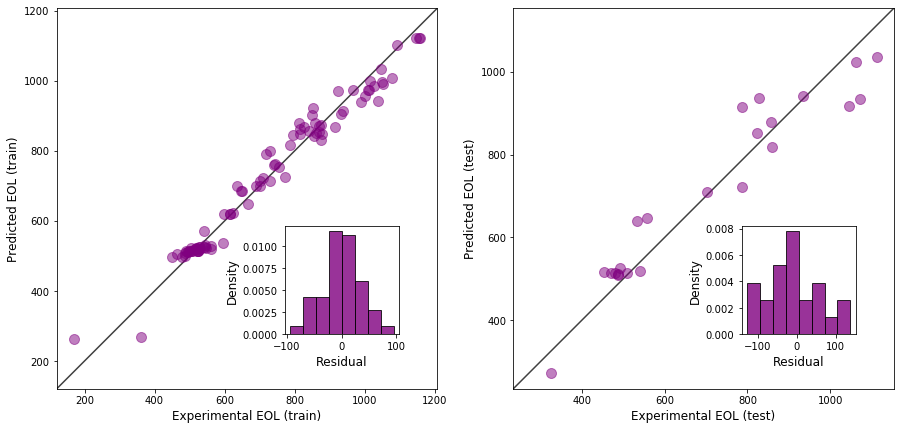

In [9]:
model, metrics = utils_models.fit_tree_based_regression(df=df,
                                                        test_size=test_size,
                                                        feature_selection=False,
                                                        scaling=False,
                                                        params=params,
                                                        plot=True,
                                                        fname='extratrees_model',
                                                        model_type='ext')

### Extratrees regression with scaling but without feature selection

Tree-based regression has started...
Tree-based regression has ended after 0.62 seconds
------------------
Model metrics:
------------------
Train:
{'MAE': 28.328088183394282,
 'MAPE': 0.044270955817946794,
 'MSE': 1334.242369907431,
 'R2 score': 0.9707630469900737,
 'RMSE': 36.52728254205931}
Test:
{'MAE': 56.97612749361653,
 'MAPE': 0.08380137768386434,
 'MSE': 4990.474013809862,
 'R2 score': 0.9088066028971669,
 'RMSE': 70.64328711073588}


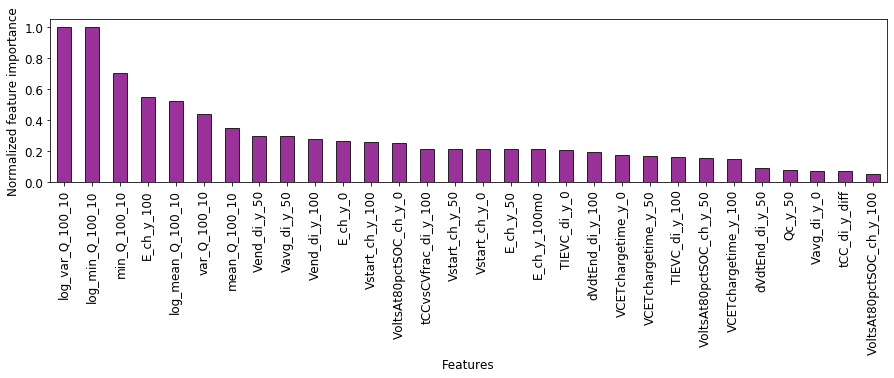

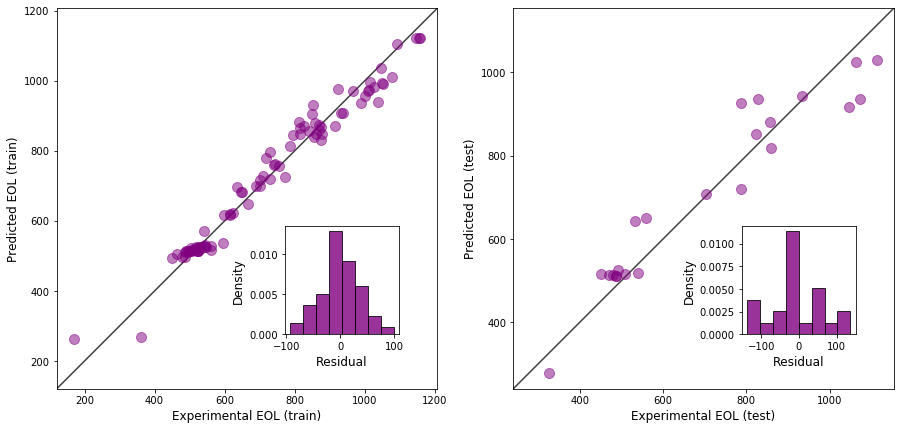

In [10]:
# call Extratrees regression function with scaling and feature selection
model, metrics  = utils_models.fit_tree_based_regression(df=df,
                                                        test_size=test_size,
                                                        feature_selection=False,
                                                        scaling=True,
                                                        params=params,
                                                        plot=True,
                                                        fname='extratrees_model_scaled',
                                                        model_type='ext')

### Extratrees regression with feature selection and with/without scaling for $k=0.5, 0.6, 0.7, 0.8, 0.9$

In [11]:
# define a list of k
k_list = [0.9, 0.8, 0.6, 0.5, 0.4, 0.3, 0.2]

In [12]:
# A function to fit model with several values of k and choosing whether to perform scaling or not
def k_effect_on_model(scaling, fname):

    metric_list = []

    for k in k_list:
        print('Fitting model with {} percent of features...'.format(int(k*100)))
        model, metrics = utils_models.fit_tree_based_regression(df=df,
                                                                test_size=test_size,
                                                                feature_selection=True,
                                                                scaling=scaling,
                                                                params=params,
                                                                plot=True,
                                                                fname=fname+str(int(k*100)),
                                                                model_type='ext',
                                                                k=k)

        metric_list.append(list(metrics[0].values()) + list(metrics[1].values()))

    metric_data = pd.DataFrame(data=np.array(metric_list), columns=[data + metric for data in ('Train_', 'Test_') for metric in metrics[0].keys()], index=np.array(k_list)*100)
    metric_data.index.name = 'Features used (%)'
    
    return metric_data

Fitting model with 90 percent of features...
25 features removed from a total of 244
Tree-based regression has started...
Tree-based regression has ended after 0.68 seconds
------------------
Model metrics:
------------------
Train:
{'MAE': 28.759675564212447,
 'MAPE': 0.04484352275477921,
 'MSE': 1377.3728659253602,
 'R2 score': 0.9698179381299357,
 'RMSE': 37.112974361068936}
Test:
{'MAE': 57.029401368290486,
 'MAPE': 0.08404320590113128,
 'MSE': 5024.187233316849,
 'R2 score': 0.9081905445817428,
 'RMSE': 70.88150134779066}


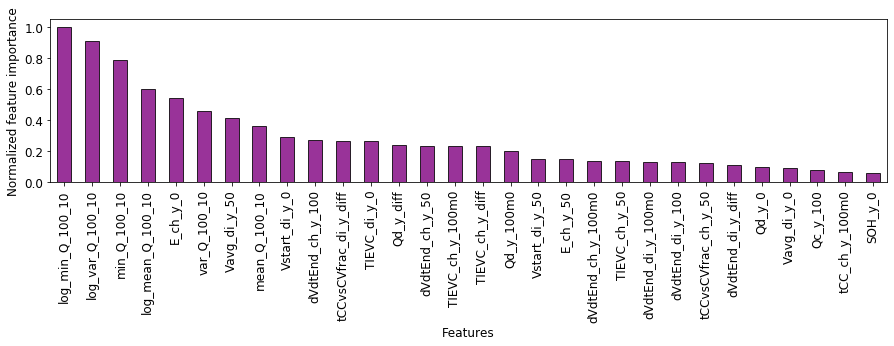

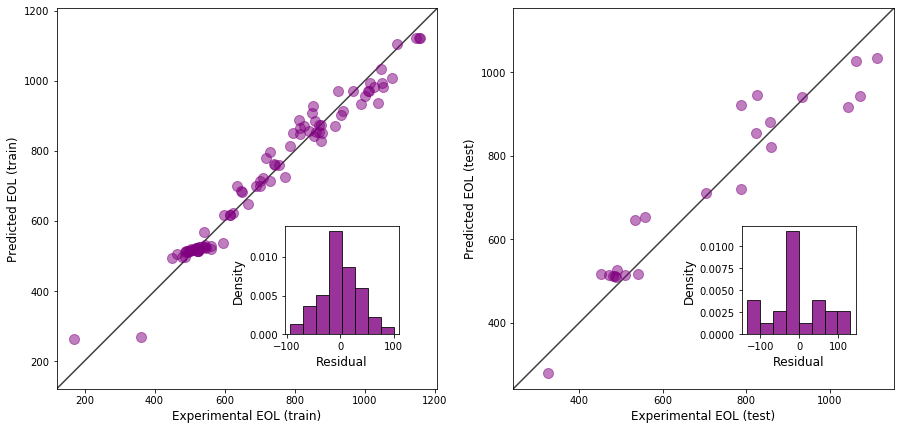

Fitting model with 80 percent of features...
49 features removed from a total of 244
Tree-based regression has started...
Tree-based regression has ended after 0.62 seconds
------------------
Model metrics:
------------------
Train:
{'MAE': 29.706319440632665,
 'MAPE': 0.04609644063176631,
 'MSE': 1470.2979215627938,
 'R2 score': 0.9677816922825602,
 'RMSE': 38.34446402758544}
Test:
{'MAE': 55.3959031590849,
 'MAPE': 0.08216547809613335,
 'MSE': 4724.664026593409,
 'R2 score': 0.9136638801119266,
 'RMSE': 68.73619153396128}


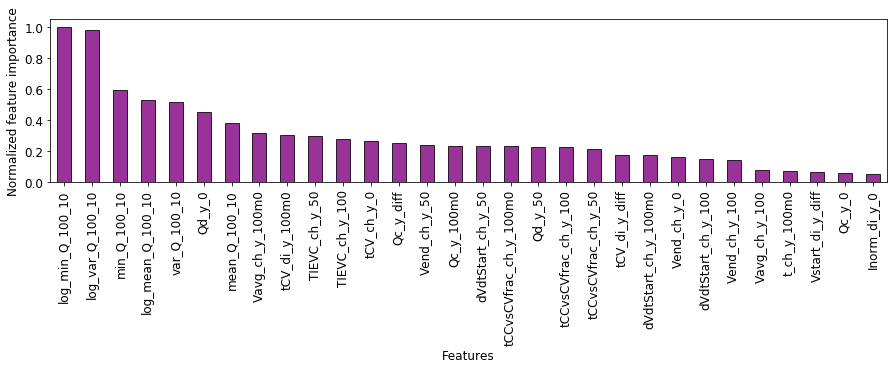

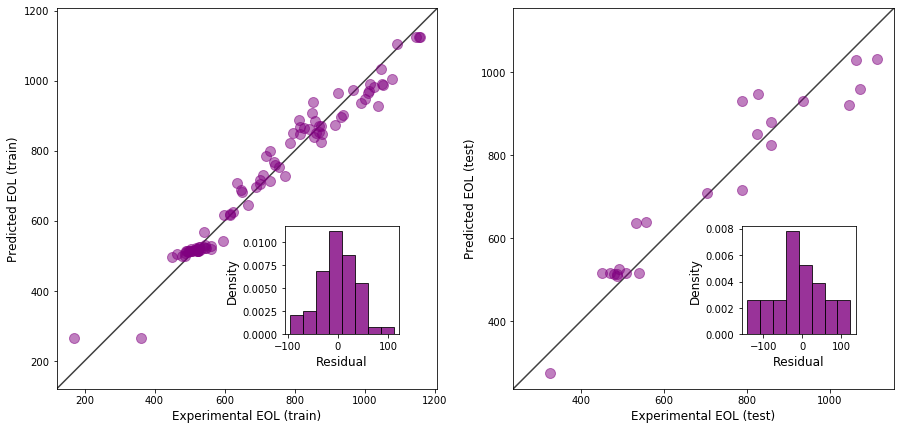

Fitting model with 60 percent of features...
98 features removed from a total of 244
Tree-based regression has started...
Tree-based regression has ended after 0.56 seconds
------------------
Model metrics:
------------------
Train:
{'MAE': 30.30662297638446,
 'MAPE': 0.046758644616684386,
 'MSE': 1521.3554325390603,
 'R2 score': 0.966662880526252,
 'RMSE': 39.00455656124115}
Test:
{'MAE': 53.7012047559943,
 'MAPE': 0.07921405695465929,
 'MSE': 4420.398097361091,
 'R2 score': 0.9192238817535667,
 'RMSE': 66.48607446195851}


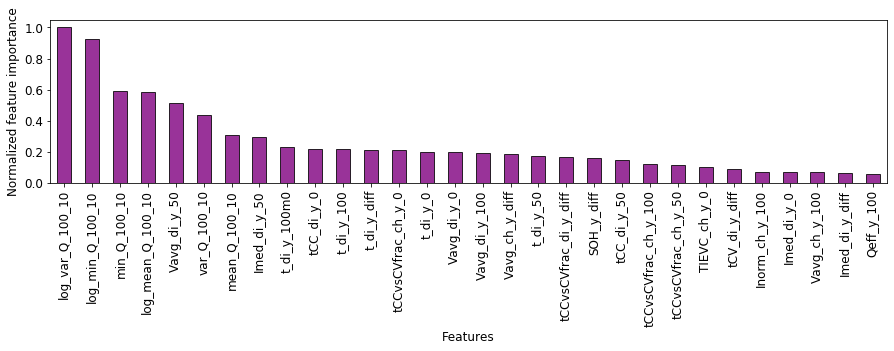

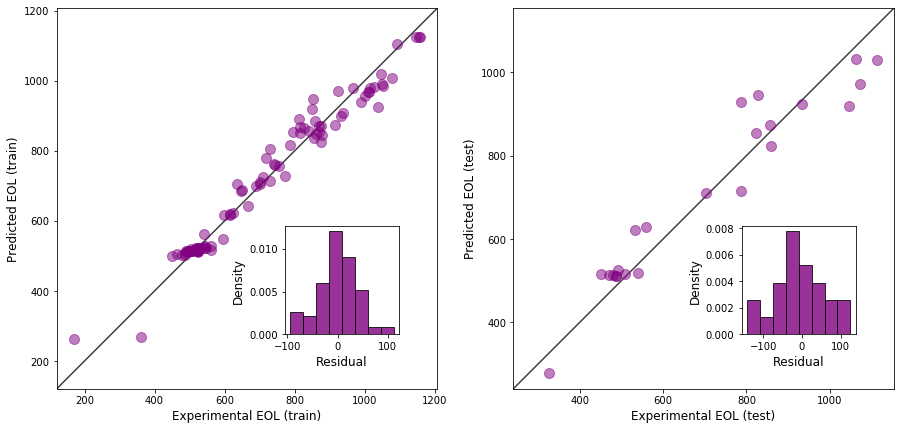

Fitting model with 50 percent of features...
122 features removed from a total of 244
Tree-based regression has started...
Tree-based regression has ended after 0.54 seconds
------------------
Model metrics:
------------------
Train:
{'MAE': 30.771614765245992,
 'MAPE': 0.04742762956682044,
 'MSE': 1573.921966112578,
 'R2 score': 0.9655110018971164,
 'RMSE': 39.67268539073928}
Test:
{'MAE': 53.39064816340274,
 'MAPE': 0.07844166841237017,
 'MSE': 4332.20317761278,
 'R2 score': 0.9208355110931452,
 'RMSE': 65.81947415174919}


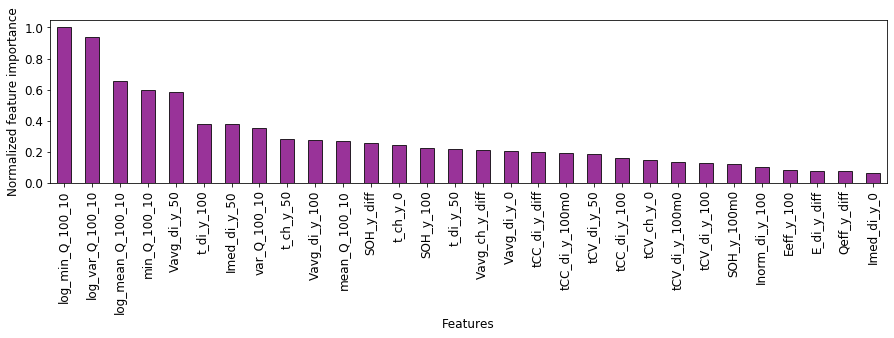

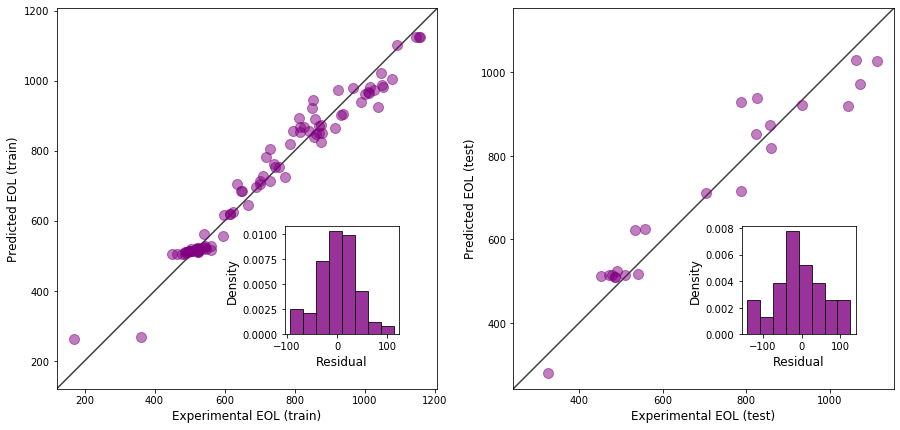

Fitting model with 40 percent of features...
147 features removed from a total of 244
Tree-based regression has started...
Tree-based regression has ended after 0.51 seconds
------------------
Model metrics:
------------------
Train:
{'MAE': 31.358841353665245,
 'MAPE': 0.04800986228863608,
 'MSE': 1664.3535151936373,
 'R2 score': 0.9635293956981758,
 'RMSE': 40.7964890057176}
Test:
{'MAE': 52.474482590737395,
 'MAPE': 0.07738594289102319,
 'MSE': 4129.461544325761,
 'R2 score': 0.9245403091188353,
 'RMSE': 64.26088658216412}


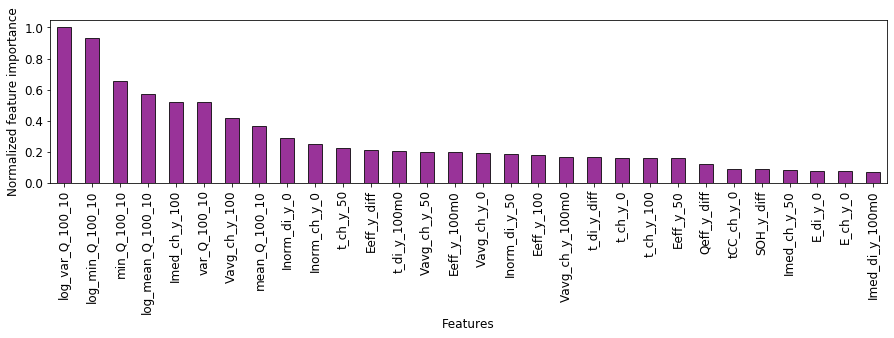

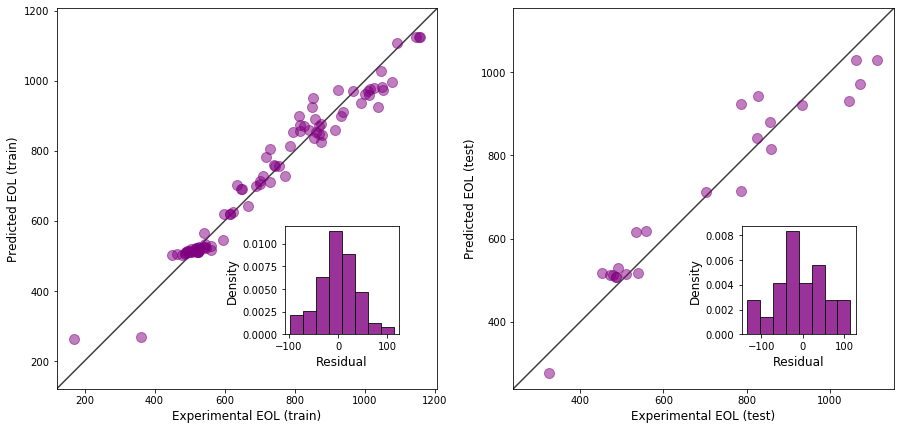

Fitting model with 30 percent of features...
171 features removed from a total of 244
Tree-based regression has started...
Tree-based regression has ended after 0.46 seconds
------------------
Model metrics:
------------------
Train:
{'MAE': 32.17155942665792,
 'MAPE': 0.048965809927243024,
 'MSE': 1708.3521618970992,
 'R2 score': 0.9625652632472937,
 'RMSE': 41.332216997121016}
Test:
{'MAE': 52.40957961608084,
 'MAPE': 0.07748448762249374,
 'MSE': 4305.65422197895,
 'R2 score': 0.9213206532754473,
 'RMSE': 65.61748411802262}


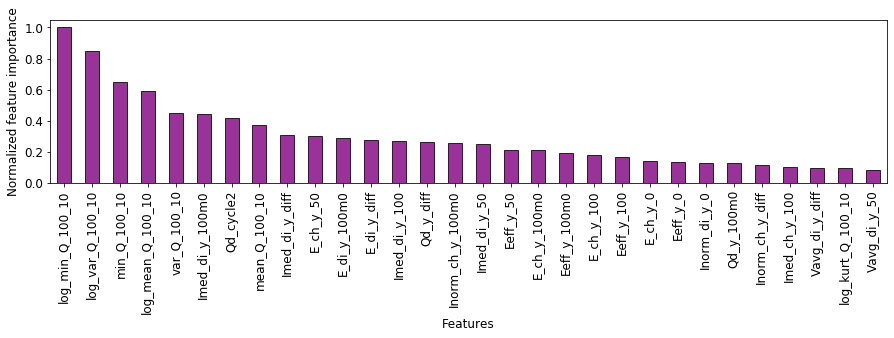

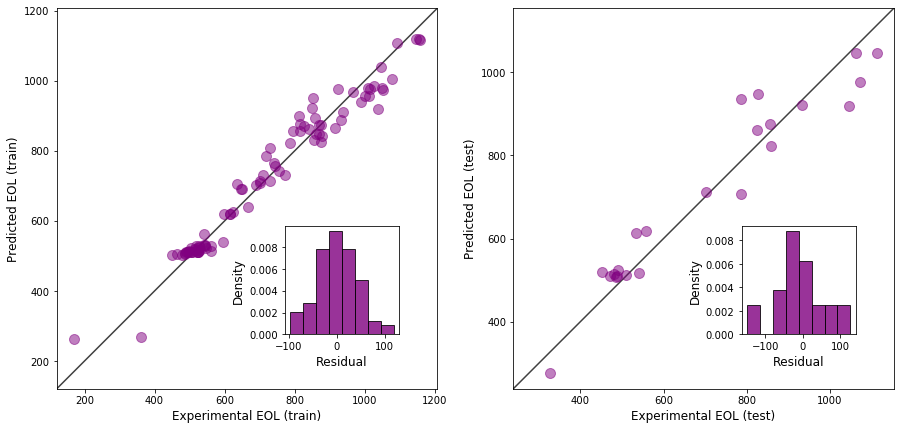

Fitting model with 20 percent of features...
196 features removed from a total of 244
Tree-based regression has started...
Tree-based regression has ended after 0.44 seconds
------------------
Model metrics:
------------------
Train:
{'MAE': 33.75266506293874,
 'MAPE': 0.05081074199110139,
 'MSE': 1869.2937910211272,
 'R2 score': 0.9590385855205427,
 'RMSE': 43.23533035633158}
Test:
{'MAE': 51.53712493790336,
 'MAPE': 0.07387406609333667,
 'MSE': 4552.693127238862,
 'R2 score': 0.9168063893147744,
 'RMSE': 67.47364765031502}


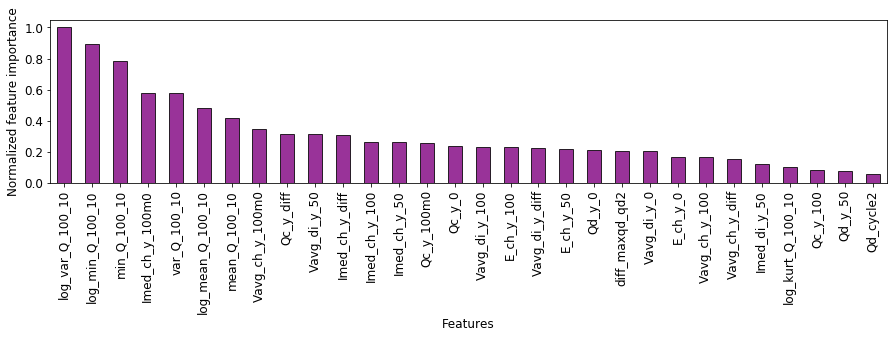

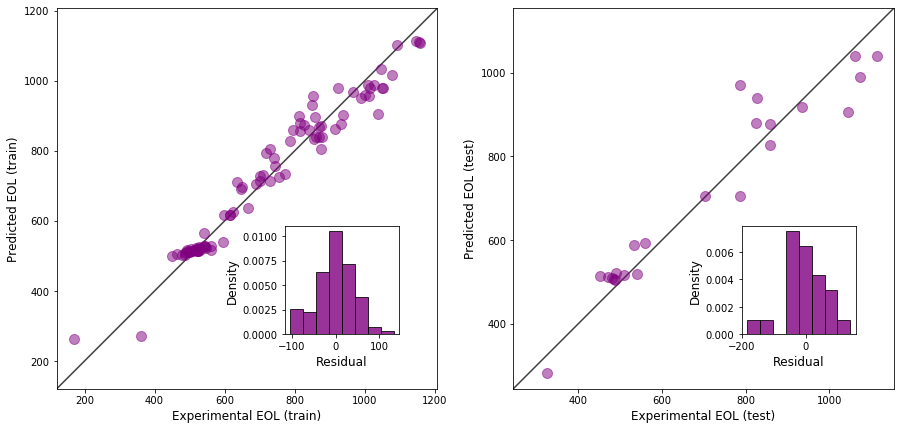

,Train_MAE,Train_MAPE,Train_MSE,Train_RMSE,Train_R2 score,Test_MAE,Test_MAPE,Test_MSE,Test_RMSE,Test_R2 score
Features used (%),,,,,,,,,,
90.0,28.759676,0.044844,1377.372866,37.112974,0.969818,57.029401,0.084043,5024.187233,70.881501,0.908191
80.0,29.706319,0.046096,1470.297922,38.344464,0.967782,55.395903,0.082165,4724.664027,68.736192,0.913664
60.0,30.306623,0.046759,1521.355433,39.004557,0.966663,53.701205,0.079214,4420.398097,66.486074,0.919224
50.0,30.771615,0.047428,1573.921966,39.672685,0.965511,53.390648,0.078442,4332.203178,65.819474,0.920836
40.0,31.358841,0.048010,1664.353515,40.796489,0.963529,52.474483,0.077386,4129.461544,64.260887,0.924540
30.0,32.171559,0.048966,1708.352162,41.332217,0.962565,52.409580,0.077484,4305.654222,65.617484,0.921321
20.0,33.752665,0.050811,1869.293791,43.235330,0.959039,51.537125,0.073874,4552.693127,67.473648,0.916806


In [13]:
# without scaling
k_effect_on_model(scaling=False, fname='extratrees_model_ftselection_k_')

Fitting model with 90 percent of features...
25 features removed from a total of 244
Tree-based regression has started...
Tree-based regression has ended after 0.65 seconds
------------------
Model metrics:
------------------
Train:
{'MAE': 28.561697338559703,
 'MAPE': 0.04475630903526956,
 'MSE': 1349.7586265942898,
 'R2 score': 0.9704230427465604,
 'RMSE': 36.739061318905385}
Test:
{'MAE': 57.126926765742965,
 'MAPE': 0.08361502373039782,
 'MSE': 4991.723387720781,
 'R2 score': 0.9087837724704634,
 'RMSE': 70.65212939268555}


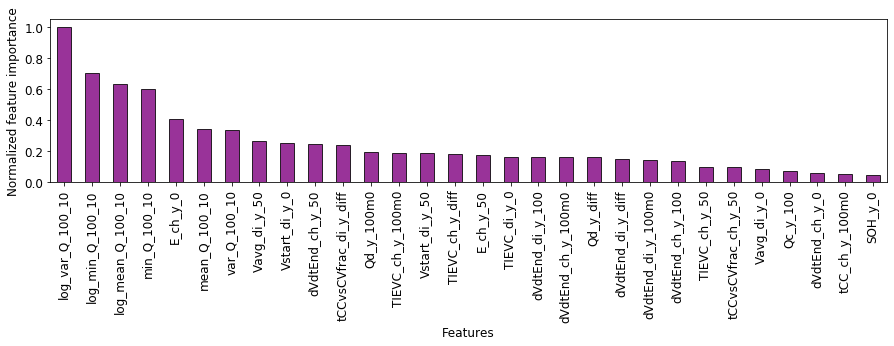

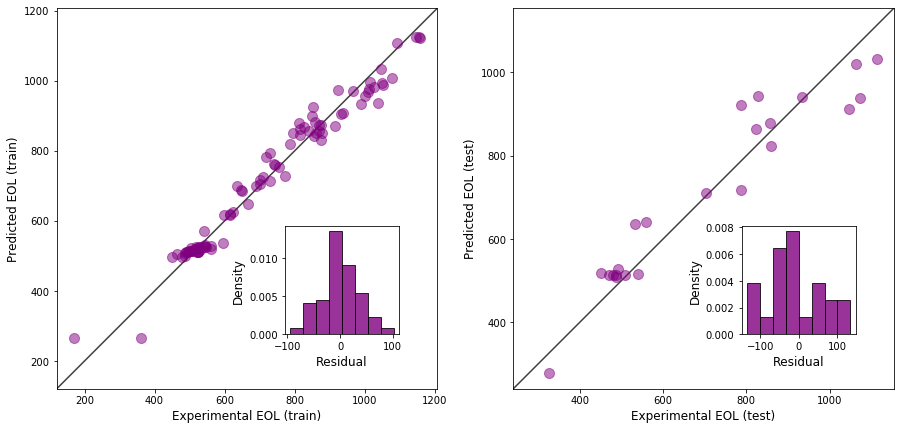

Fitting model with 80 percent of features...
49 features removed from a total of 244
Tree-based regression has started...
Tree-based regression has ended after 0.63 seconds
------------------
Model metrics:
------------------
Train:
{'MAE': 29.57268422492399,
 'MAPE': 0.045895999050310846,
 'MSE': 1456.6163854718004,
 'R2 score': 0.9680814927062447,
 'RMSE': 38.16564404633833}
Test:
{'MAE': 55.51634522051113,
 'MAPE': 0.08145875004115614,
 'MSE': 4767.933622066935,
 'R2 score': 0.9128731934173206,
 'RMSE': 69.05022535855285}


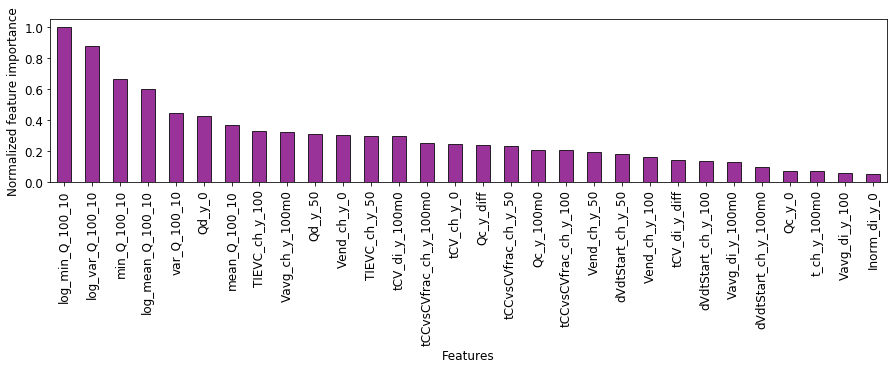

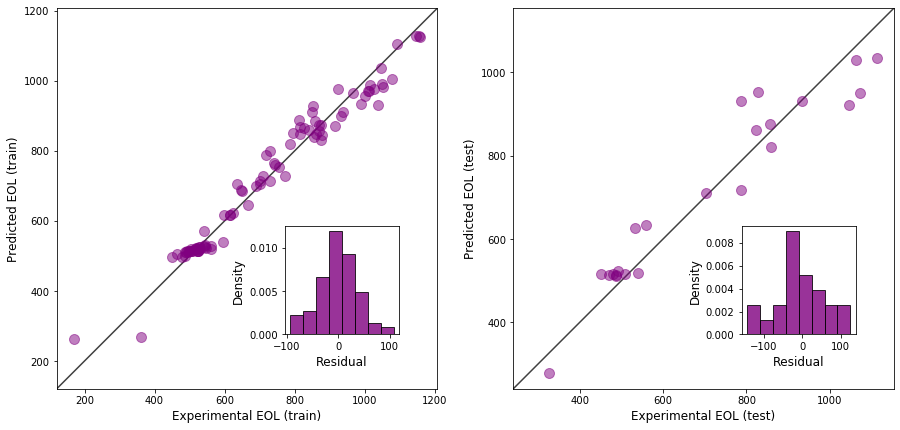

Fitting model with 60 percent of features...
98 features removed from a total of 244
Tree-based regression has started...
Tree-based regression has ended after 0.57 seconds
------------------
Model metrics:
------------------
Train:
{'MAE': 30.30708132180568,
 'MAPE': 0.04680042477199686,
 'MSE': 1521.6461602644267,
 'R2 score': 0.9666565098749844,
 'RMSE': 39.008283226315235}
Test:
{'MAE': 53.536244110156964,
 'MAPE': 0.0795581194490825,
 'MSE': 4321.799584486146,
 'R2 score': 0.9210256210900449,
 'RMSE': 65.74039537823109}


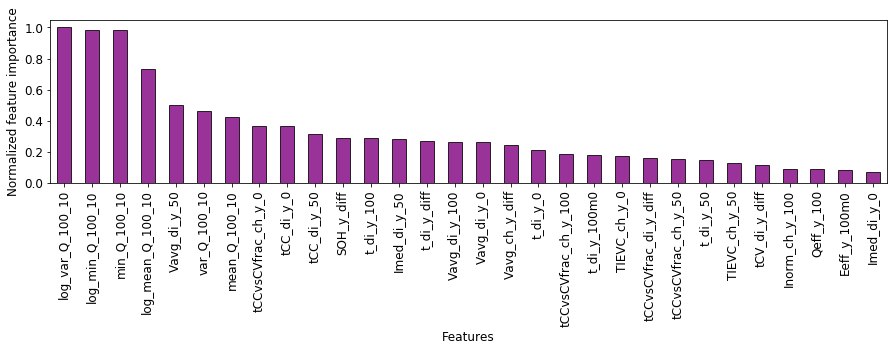

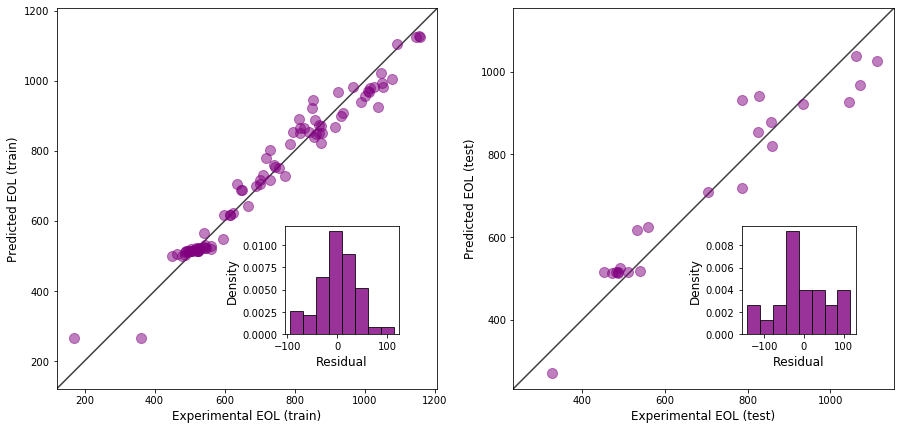

Fitting model with 50 percent of features...
122 features removed from a total of 244
Tree-based regression has started...
Tree-based regression has ended after 0.74 seconds
------------------
Model metrics:
------------------
Train:
{'MAE': 31.024542357523384,
 'MAPE': 0.047752178893817256,
 'MSE': 1578.7796188722248,
 'R2 score': 0.9654045572445739,
 'RMSE': 39.7338598536843}
Test:
{'MAE': 53.429700718669075,
 'MAPE': 0.07881351714448649,
 'MSE': 4325.270219259375,
 'R2 score': 0.9209622004662329,
 'RMSE': 65.76678659672658}


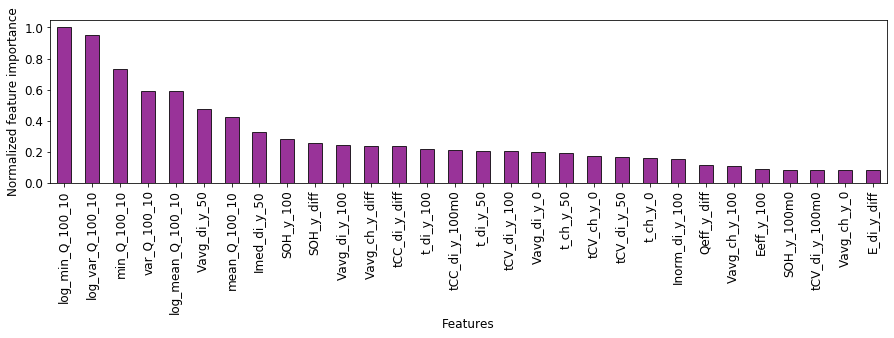

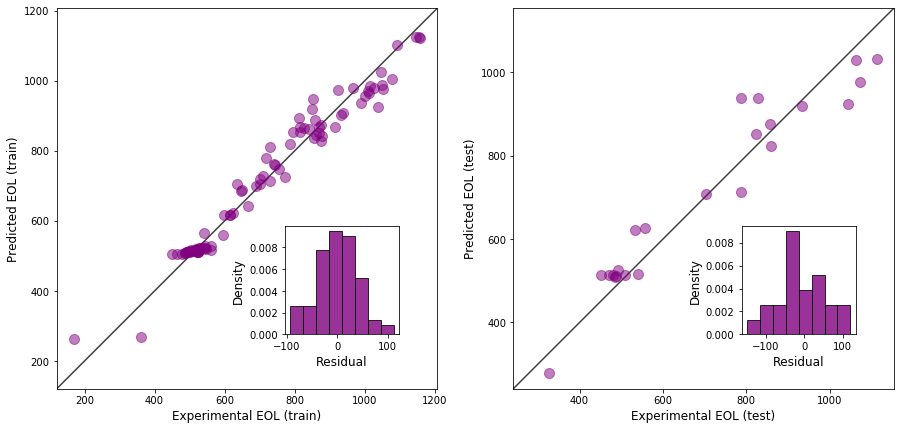

Fitting model with 40 percent of features...
147 features removed from a total of 244
Tree-based regression has started...
Tree-based regression has ended after 0.69 seconds
------------------
Model metrics:
------------------
Train:
{'MAE': 31.41285571736584,
 'MAPE': 0.04813313731584401,
 'MSE': 1643.7486919568803,
 'R2 score': 0.9639809045561899,
 'RMSE': 40.54317071908511}
Test:
{'MAE': 52.116347034338325,
 'MAPE': 0.07708902873520365,
 'MSE': 4108.114749658511,
 'R2 score': 0.9249303896437666,
 'RMSE': 64.09457660097702}


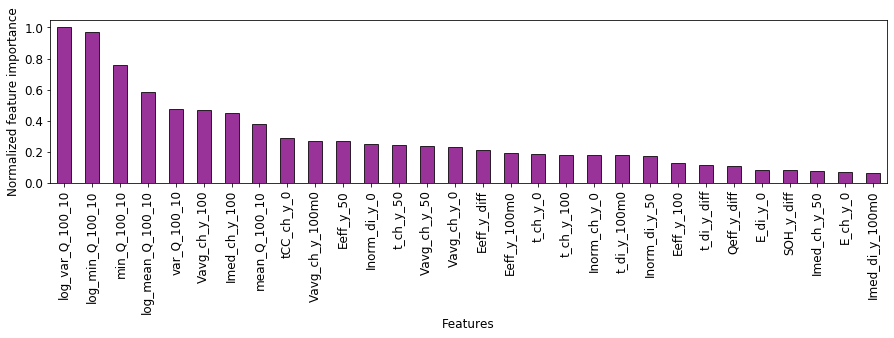

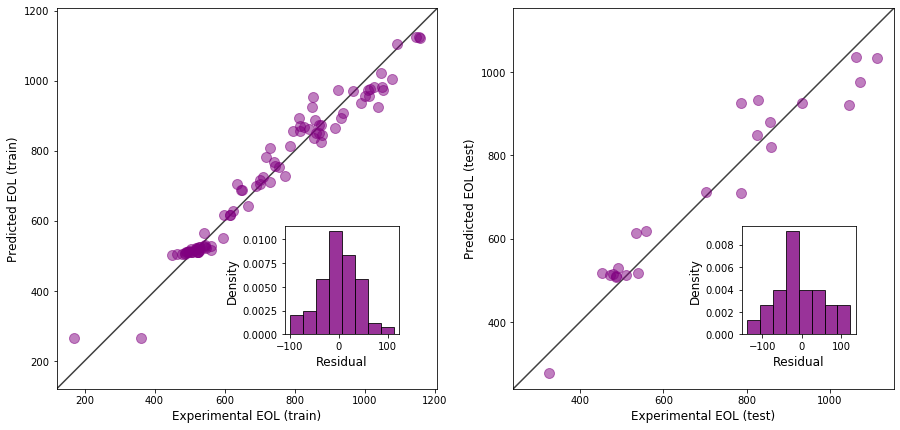

Fitting model with 30 percent of features...
171 features removed from a total of 244
Tree-based regression has started...
Tree-based regression has ended after 0.65 seconds
------------------
Model metrics:
------------------
Train:
{'MAE': 32.47580425773504,
 'MAPE': 0.049372739369525256,
 'MSE': 1737.331368577772,
 'R2 score': 0.9619302484080884,
 'RMSE': 41.68130718412958}
Test:
{'MAE': 52.389161510789926,
 'MAPE': 0.07691516045616219,
 'MSE': 4245.24259570543,
 'R2 score': 0.9224245847675548,
 'RMSE': 65.15552621002635}


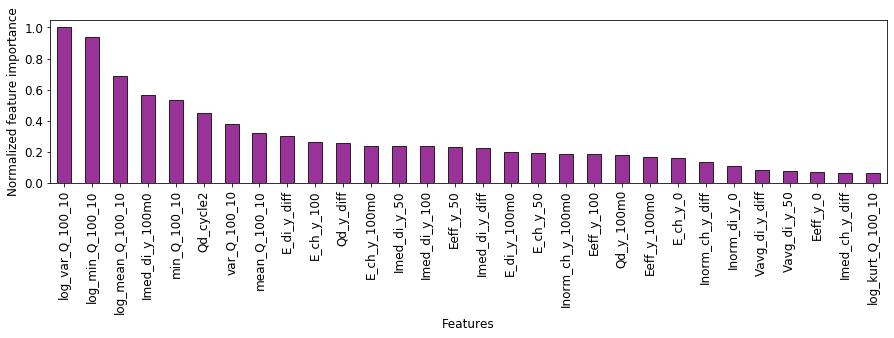

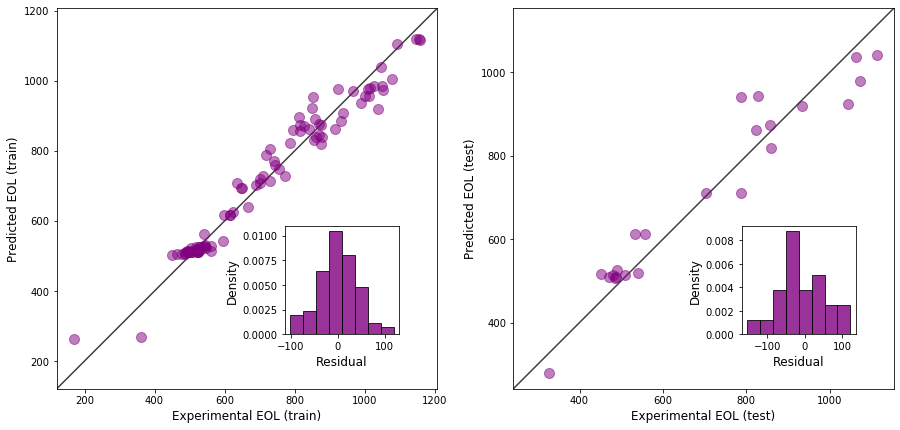

Fitting model with 20 percent of features...
196 features removed from a total of 244
Tree-based regression has started...
Tree-based regression has ended after 0.6 seconds
------------------
Model metrics:
------------------
Train:
{'MAE': 33.73994680418198,
 'MAPE': 0.050782555352755755,
 'MSE': 1868.6545960232188,
 'R2 score': 0.9590525920567908,
 'RMSE': 43.22793767950559}
Test:
{'MAE': 52.32993732865472,
 'MAPE': 0.07545393048355296,
 'MSE': 4498.320721998138,
 'R2 score': 0.9177999631373878,
 'RMSE': 67.06952155784427}


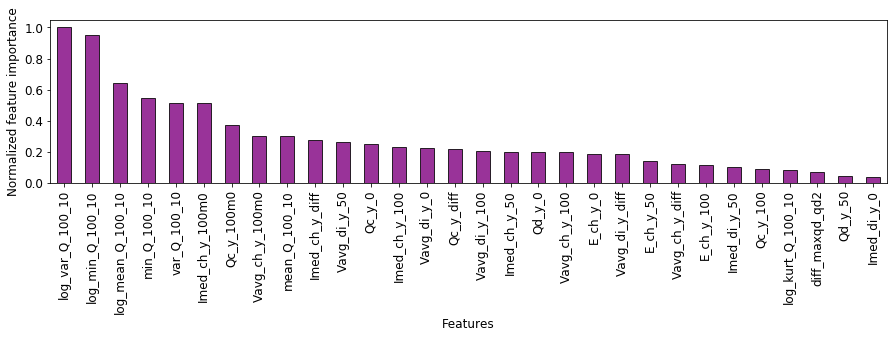

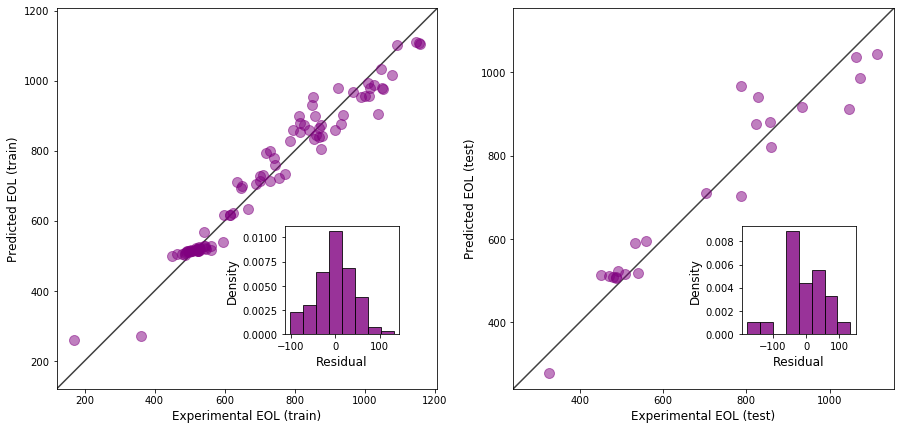

,Train_MAE,Train_MAPE,Train_MSE,Train_RMSE,Train_R2 score,Test_MAE,Test_MAPE,Test_MSE,Test_RMSE,Test_R2 score
Features used (%),,,,,,,,,,
90.0,28.561697,0.044756,1349.758627,36.739061,0.970423,57.126927,0.083615,4991.723388,70.652129,0.908784
80.0,29.572684,0.045896,1456.616385,38.165644,0.968081,55.516345,0.081459,4767.933622,69.050225,0.912873
60.0,30.307081,0.046800,1521.646160,39.008283,0.966657,53.536244,0.079558,4321.799584,65.740395,0.921026
50.0,31.024542,0.047752,1578.779619,39.733860,0.965405,53.429701,0.078814,4325.270219,65.766787,0.920962
40.0,31.412856,0.048133,1643.748692,40.543171,0.963981,52.116347,0.077089,4108.114750,64.094577,0.924930
30.0,32.475804,0.049373,1737.331369,41.681307,0.961930,52.389162,0.076915,4245.242596,65.155526,0.922425
20.0,33.739947,0.050783,1868.654596,43.227938,0.959053,52.329937,0.075454,4498.320722,67.069522,0.917800


In [14]:
# with scaling
k_effect_on_model(scaling=True, fname='extratrees_model_ftselection_scaled_k_')

### Perform $k$-Fold Repeated Cross-validation on the best model

In [15]:
# the best model here uses less features and excelled in MAPE: feature_selection=True, k=0.2
model = ExtraTreesRegressor(**params)
best_model_cross_val_scores = utils_models.repeated_kfold_cross_validation(model=model,
                                                                           df=df,
                                                                           n_splits=3,
                                                                           n_repeats=3,
                                                                           feature_selection=True,
                                                                           scaling=False,
                                                                           k=0.2)

best_model_cross_val_scores

196 features removed from a total of 244


{'test_MAE': (58.007756518606, 8.23406658974408),
 'test_MAPE': (0.08951986290960451, 0.026112455506540715),
 'test_MSE': (6171.124066516054, 2070.9915607453595),
 'test_R2 score': (0.8700100006236742, 0.037642933630770294)}

### Hyper-parameter tuning

In [16]:
estimator = ExtraTreesRegressor()
param_grid = {"n_estimators": [100, 200, 300, 400, 500],
                    "max_depth": [2, 3, 4, 5],
                    "min_samples_split": [2, 3, 4, 5]}
scoring = 'neg_mean_absolute_percentage_error'
cv = 3

# for the model without feature selection
best_param_all , _ = utils_models.hyperparameter_tuning(df, estimator, param_grid, scoring, cv, feature_selection=False, k=None)
print(best_param_all)

{'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 300}


In [17]:
# for the model with feature selection
best_param_selected, _ = utils_models.hyperparameter_tuning(df, estimator, param_grid, scoring, cv, feature_selection=True, k=0.2)
print(best_param_selected)

196 features removed from a total of 244
{'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 400}


### Use the best hyper-parameter to rebuild the models and carry out repeated $k$-fold cross-validation

Tree-based regression has started...
Tree-based regression has ended after 0.5 seconds
------------------
Model metrics:
------------------
Train:
{'MAE': 17.106232785824332,
 'MAPE': 0.02995248691943697,
 'MSE': 584.0296167042461,
 'R2 score': 0.9872022903446156,
 'RMSE': 24.166704713391233}
Test:
{'MAE': 55.48913392701158,
 'MAPE': 0.08187248411847217,
 'MSE': 4823.574450496569,
 'R2 score': 0.9118564410711361,
 'RMSE': 69.45195785934742}


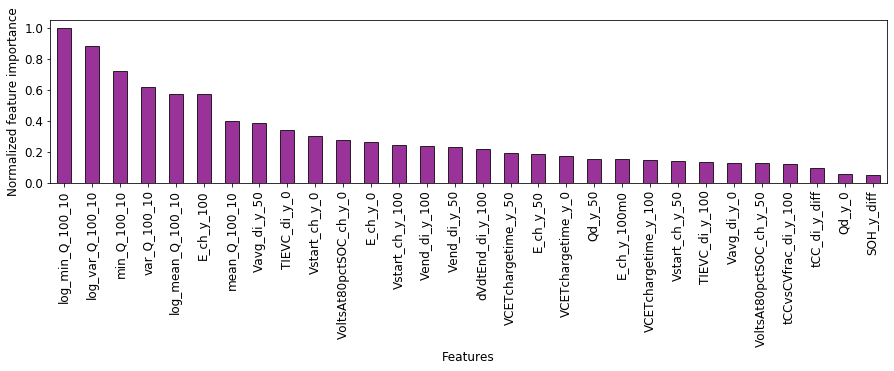

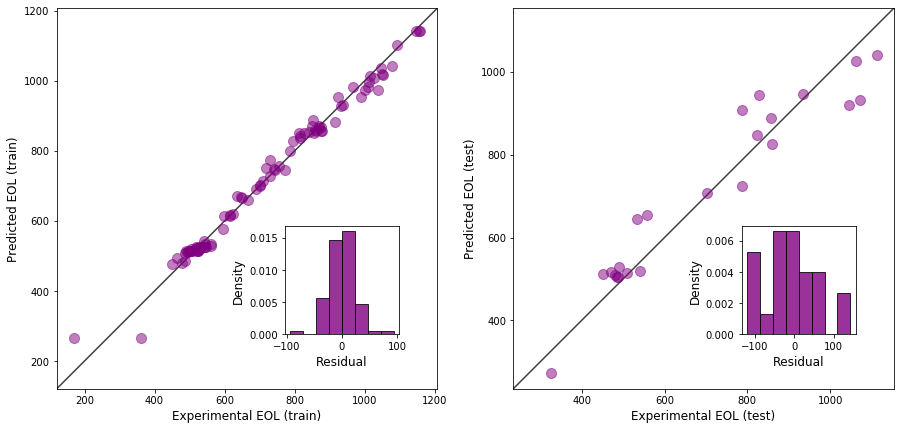

In [18]:
# for the model using all the features 
best_model_all, metrics_all = utils_models.fit_tree_based_regression(df=df,
                                                                    test_size=test_size,
                                                                    feature_selection=False,
                                                                    scaling=False,
                                                                    params=best_param_all,
                                                                    plot=True,
                                                                    fname='best_all_features_ext_model',
                                                                    model_type='ext')

196 features removed from a total of 244
Tree-based regression has started...
Tree-based regression has ended after 0.58 seconds
------------------
Model metrics:
------------------
Train:
{'MAE': 19.848330727278857,
 'MAPE': 0.026625672401255285,
 'MSE': 707.7480310633385,
 'R2 score': 0.9844912765523236,
 'RMSE': 26.60353418370083}
Test:
{'MAE': 48.87593183210229,
 'MAPE': 0.06897533806741753,
 'MSE': 4261.143264470951,
 'R2 score': 0.9221340239917805,
 'RMSE': 65.27743304137311}


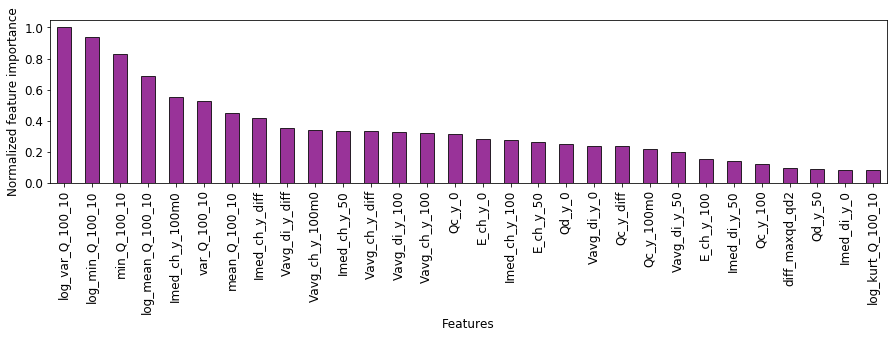

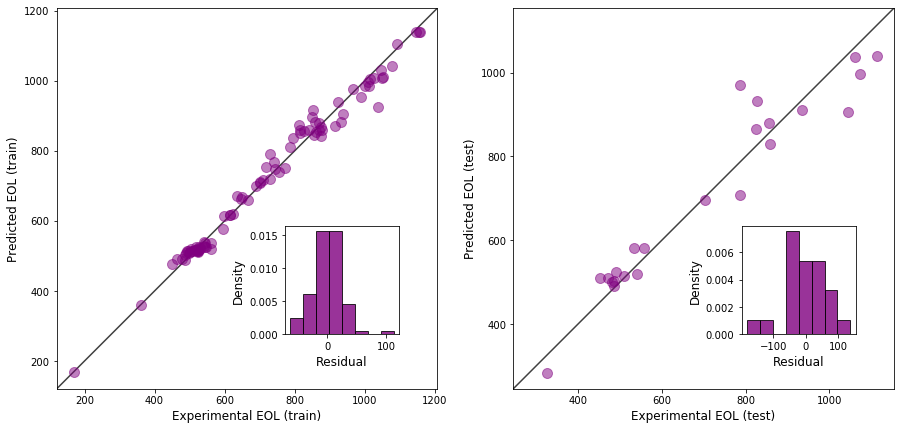

In [19]:
# for the model using selected features 
best_model_selected, metrics_selected = utils_models.fit_tree_based_regression(df=df,
                                                                               test_size=test_size,
                                                                               feature_selection=True,
                                                                               scaling=False,
                                                                               params=best_param_selected,
                                                                               plot=True,
                                                                               fname='best_selected_features_ext_model',
                                                                               model_type='ext',
                                                                               k=0.2)

In [20]:
# Repeated k-fold cross-validation for the model obtained from grid search and using all features
model = ExtraTreesRegressor(**best_param_all)
utils_models.repeated_kfold_cross_validation(model=model,
                                            df=df,
                                            n_splits=3,
                                            n_repeats=3,
                                            feature_selection=False,
                                            scaling=False)



{'test_MAE': (57.324706423943475, 10.119470891225173),
 'test_MAPE': (0.08943066356959986, 0.02844758336470905),
 'test_MSE': (6101.845618287316, 2644.9451470126633),
 'test_R2 score': (0.8718637522360505, 0.049003585198579856)}

In [21]:
# Repeated k-fold cross-validation for the model obtained from grid search and using selected features
model = ExtraTreesRegressor(**best_param_selected)
utils_models.repeated_kfold_cross_validation(model=model,
                                            df=df,
                                            n_splits=3,
                                            n_repeats=3,
                                            feature_selection=True,
                                            scaling=False,
                                            k=0.2)



196 features removed from a total of 244


{'test_MAE': (56.81921697278337, 8.854205010467995),
 'test_MAPE': (0.08833400861608863, 0.02711578655524924),
 'test_MSE': (6118.084807265301, 2143.516184967055),
 'test_R2 score': (0.871338144566423, 0.03877798794950284)}